In [1]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

In [2]:
# Given 8x8 block
block = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 66, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 63, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
])
original_block = np.copy(block)

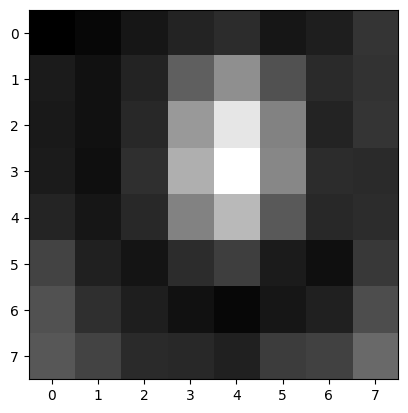

In [3]:
plt.imshow(original_block, cmap='gray')

In [4]:
# Step 0: Subtract each pixel value by 2^7
block = block - 2**7
print(block)

[[-76 -73 -67 -62 -58 -67 -64 -55]
 [-65 -69 -62 -38 -19 -43 -59 -56]
 [-66 -69 -60 -15  16 -24 -62 -55]
 [-65 -70 -57  -6  26 -22 -58 -59]
 [-61 -67 -60 -24  -2 -40 -60 -58]
 [-49 -63 -68 -58 -51 -65 -70 -53]
 [-43 -57 -64 -69 -73 -67 -63 -45]
 [-41 -49 -59 -60 -63 -52 -50 -34]]


In [5]:
# Step 1: Apply 2D Discrete Cosine Transform (DCT) to the block
dct_block = dct(dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')
print("Step 1: DCT Coefficients")
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:.0f}"})
print(dct_block)
print()

Step 1: DCT Coefficients
[[-415 -29 -62 24 55 -20 -1 3]
 [7 -21 -62 9 11 -7 -6 6]
 [-46 8 77 -25 -30 10 7 -5]
 [-50 12 35 -15 -9 6 0 3]
 [11 -8 -13 -1 -1 1 -4 1]
 [-9 1 3 -3 -1 0 2 -1]
 [-4 -1 2 -1 2 -3 1 -2]
 [-1 -1 -1 -2 -1 -1 0 -0]]



In [6]:
# Step 2: Quantization
quantization_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

In [7]:
quantized_block = np.round(dct_block / quantization_matrix)

print("Step 2: Quantized DCT Coefficients")
print(quantized_block)
print()

Step 2: Quantized DCT Coefficients
[[-26 -3 -6 2 2 -0 -0 0]
 [1 -2 -4 0 0 -0 -0 0]
 [-3 1 5 -1 -1 0 0 -0]
 [-4 1 2 -1 -0 0 0 0]
 [1 -0 -0 -0 -0 0 -0 0]
 [-0 0 0 -0 -0 0 0 -0]
 [-0 -0 0 -0 0 -0 0 -0]
 [-0 -0 -0 -0 -0 -0 0 -0]]



In [8]:
#zig-zag if required

In [9]:
denormalized_block = quantized_block * quantization_matrix

print("Step 3: Denormalized DCT Coefficients")
print(denormalized_block)
print()

Step 3: Denormalized DCT Coefficients
[[-416 -33 -60 32 48 -0 -0 0]
 [12 -24 -56 0 0 -0 -0 0]
 [-42 13 80 -24 -40 0 0 -0]
 [-56 17 44 -29 -0 0 0 0]
 [18 -0 -0 -0 -0 0 -0 0]
 [-0 0 0 -0 -0 0 0 -0]
 [-0 -0 0 -0 0 -0 0 -0]
 [-0 -0 -0 -0 -0 -0 0 -0]]



In [10]:

# Step 3: Reconstruct the block using Inverse DCT (IDCT)
reconstructed_block = idct(idct(denormalized_block, axis=0, norm='ortho'), axis=1, norm='ortho')

print("Step 3: Reconstructed Block")
print(np.round(reconstructed_block))
print()

Step 3: Reconstructed Block
[[-70 -64 -61 -64 -69 -66 -58 -50]
 [-72 -73 -61 -39 -30 -40 -54 -59]
 [-68 -78 -58 -9 13 -12 -48 -64]
 [-59 -77 -57 -0 21 -13 -51 -60]
 [-54 -75 -64 -23 -13 -44 -63 -56]
 [-52 -71 -72 -54 -53 -71 -71 -54]
 [-45 -59 -69 -68 -67 -67 -61 -50]
 [-35 -47 -61 -66 -59 -48 -44 -44]]



In [11]:


# and level shifting each inverse transformed pixel by (or ) to yield
reconstructed_block = reconstructed_block + 128
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:.0f}"})
print(reconstructed_block)

[[58 64 67 64 59 62 70 78]
 [56 55 67 89 98 88 74 69]
 [60 50 70 119 141 116 80 64]
 [69 51 71 128 149 115 77 68]
 [74 53 64 105 115 84 65 72]
 [76 57 56 74 75 57 57 74]
 [83 69 59 60 61 61 67 78]
 [93 81 67 62 69 80 84 84]]


In [12]:
error_block = original_block-reconstructed_block
print(error_block)

[[-6 -9 -6 2 11 -1 -6 -5]
 [7 4 -1 1 11 -3 -5 3]
 [2 9 -2 -6 3 -12 -14 9]
 [-6 7 -0 -6 5 -9 -7 1]
 [-7 8 4 -1 11 4 3 -2]
 [3 8 4 -4 2 6 1 1]
 [2 2 5 -1 -6 -0 -2 5]
 [-6 -2 2 6 -4 -4 -6 10]]


(-0.5, 7.5, 7.5, -0.5)

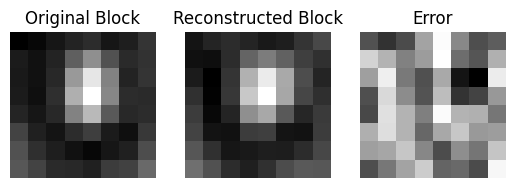

In [13]:
plt.figure()
plt.tight_layout()
plt.subplot(1,3, 1)
plt.imshow(original_block, cmap = 'gray')
plt.title('Original Block')
plt.axis('off')

plt.subplot(1,3, 2)
plt.imshow(reconstructed_block, cmap = 'gray')
plt.title('Reconstructed Block')
plt.axis('off')

plt.subplot(1,3, 3)
plt.imshow(error_block, cmap = 'gray')
plt.title('Error')
plt.axis('off')